# Shape comparison

Following processing through the described range of methods 

In [1]:
from AmpScan import AmpObject, align, registration
%matplotlib inline

In [2]:
base = AmpObject('stl_file.stl')
move = AmpObject('stl_file_2.stl')
# These are already pre-aligned so add some rotation 
move.rotateAng([20, -30, 10], ang='deg')

## Alignment

Then we create the alignment object, although we don't want to run the ICP algorithm yet so we set maxiter=0. By default, when you create the align object it will run the algorithm with the passed variables 

In [3]:
al = align(move, base, maxiter=0)

C:\Users\Josh\Anaconda3\envs\ampscan\lib\site-packages\vtk\util\numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


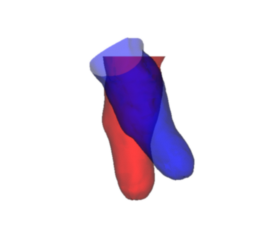

In [4]:
import matplotlib.pyplot as plt
plt.axis('off')
im = al.genIm(crop='False')[0]
ax = plt.imshow(im, interpolation='bicubic')

As we can see, the two scans are misaliged. We can then call the ICP method on the align object and re-render

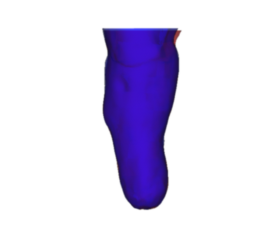

In [5]:
al.runICP()
al.s.addActor()
al.m.addActor()
plt.axis('off')
im = al.genIm(crop='False')[0]
ax = plt.imshow(im, interpolation='bicubic')

## Registration

Following alignment, we can then perform a registration stage which then enables direct shape comparison between the two shapes. First, we create the registration object, this automatically runs the registration step. 

In [6]:
reg = registration(al.s, al.m, steps=10, neigh=10, smooth=1)

c:\users\josh\documents\code\ampscan\AmpScan\core.py:248: RuntimeWarning: invalid value encountered in true_divide
  self.norm = np.divide(norms, mag[:,None])


reg.reg is the AmpObject resulting from the registration, with the displacement field stored in the values attribute. This can then be plotted with a scalar bar

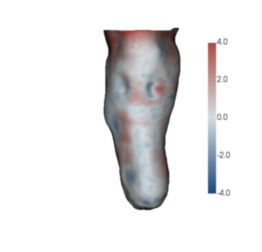

In [12]:
plt.axis('off')
reg.reg.createCMap()
reg.reg.addActor(CMap=reg.reg.CMapN2P)
reg.reg.actor.setScalarRange([-4, 4])
im, win = reg.reg.genIm(out='im')
win.setScalarBar(reg.reg.actor)
win.Render()
im = win.getImage()
ax = plt.imshow(im, interpolation='bicubic')

Now we've compared the two shapes we can now analyse the shape in more detail